import packeges

In [48]:
import pandas as pd
import numpy as np
# for moving around libraries 
import os 
# for visualizing 
import matplotlib.pyplot as plt
import seaborn as sns
# for finding word 
import re

In [110]:
# for exporting to Ilustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Google trends search for 'airbnb office' in NYC, NY

In [63]:
# see on which directory im on 
#os.getcwd()
# save the 'Google trends' into the var 'gtrend'
gtrend = pd.read_csv("./data/google_trend_airbnb_office.csv", 
                     header=0, 
                     infer_datetime_format=True, 
                     names=['Month','airbnb office: (New York)']).iloc[1:]

It seems that the first column names are inside the data frame as a first row.

In [76]:
#gtrend.reset_index(level=0, inplace=True)

In [74]:
# put back the index
gtrend = gtrend.drop(columns=['index','level_0'])

In [105]:
gtrend.dtypes

Month                        datetime64[ns]
airbnb office: (New York)             int64
dtype: object

In [91]:
gtrend.dtypes
gtrend['airbnb office: (New York)'] = pd.to_numeric(gtrend['airbnb office: (New York)'])
gtrend["Month"]= pd.to_datetime(gtrend["Month"]) 
gtrend.dtypes

Month                        datetime64[ns]
airbnb office: (New York)             int64
dtype: object

Cut off the empty rows befroe the year 2011 (when data collecting started)

In [125]:
gtrend = gtrend[(gtrend['Month'].dt.year > 2011)]

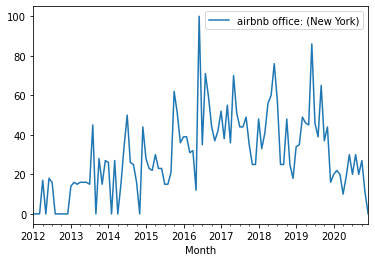

In [133]:
# plot
gtrend.plot( x='Month', y='airbnb office: (New York)', kind='line')

Let's export this to illustrator

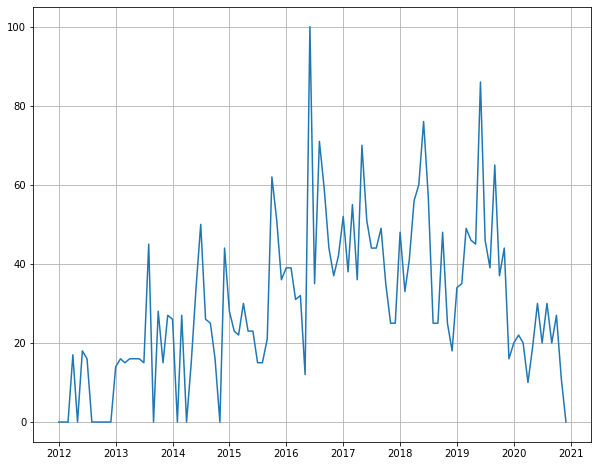

In [141]:
plt.figure(figsize=((10,8)))
plt.grid(True)
plt.plot('Month','airbnb office: (New York)', data=gtrend)
plt.savefig("GtrendLinePlt.pdf", transparent=True)

In [132]:
gtrend.plt.show()

# Let's look at airbnb listings in NYC which are offices 

In [541]:
bnb = pd.read_csv("./data/AB_NYC_2019.csv")

first look for rows with 'name' or 'room_type' that contain office.

In [542]:
bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


create an index list of rows to drop (one's that don't contain 'office'

In [543]:
# find listings that include an office
description = list(bnb['name'])
substring = 'office'

# create empty lists
index_list = []
# returns match object
i = 0 
while i < len(description):
    string = description[i]
    if isinstance(description[i], str):
        if not re.search(substring, string, flags=re.IGNORECASE):
            index_list.append(i) 
    i = i+1
#index_list

In [544]:
#bnb[~bnb.name.str.contains("office")]
bnb_offices = bnb.drop(index_list)
bnb_offices.reset_index(level=0, inplace=True)
bnb_offices

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,90,20724,Sunny room+Pvte office in huge loft,961342,Augustin,Brooklyn,Bushwick,40.70032,-73.93830,Private room,65,4,24,2019-05-26,0.28,1,317
1,999,404502,ARTIST LOFT+OFFICE in PRIME WILLIAMSBURG!,242506,Jsun,Brooklyn,Williamsburg,40.70930,-73.96484,Private room,123,3,269,2019-06-05,3.09,3,158
2,1369,602142,2B+Office Perfect 4 Young Family!!,2233907,Kyle,Brooklyn,Prospect Heights,40.67963,-73.97237,Entire home/apt,260,14,5,2014-10-18,0.07,1,0
3,2055,921441,Artsy Bedroom/Office in WaHi,4954283,Michelle,Manhattan,Washington Heights,40.84408,-73.93675,Private room,75,1,120,2019-06-21,1.89,1,90
4,2780,1523556,Simply brooklyn. Bedroom with office off L train.,7304881,Amanda,Brooklyn,Williamsburg,40.71041,-73.93847,Private room,178,2,2,2016-09-04,0.06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,43015,33399180,Large Sunny 3Bedroom Apartment with Office,139712252,Charn,Brooklyn,Crown Heights,40.66652,-73.93167,Entire home/apt,150,3,6,2019-06-25,2.17,1,313
76,44380,34204219,Bedroom + Private Office by Barclays Ctr,20702874,Jody,Brooklyn,Park Slope,40.68092,-73.97823,Private room,68,14,0,NaN,NaN,1,4
77,45230,34619743,Massive One Bedroom with Office /Yoga Room /Yard,10099608,Alexa,Brooklyn,Greenpoint,40.72455,-73.94633,Entire home/apt,149,3,2,2019-06-19,2.00,1,6
78,45428,34743695,Spacious 2 br Apartment with Home Office,5993014,Jazmín,Brooklyn,Crown Heights,40.67266,-73.95856,Entire home/apt,75,15,0,NaN,NaN,1,6


In [ ]:
bnb_offices

What's the precent of offices out of all airbnb listings

In [229]:
len(bnb_offices.index)/len(bnb.index)*100

0.1636159116474077

let's look at spaces that are only offices out of those options

In [233]:
sngl_room_office = bnb_offices.loc[bnb_offices['room_type'] == 'Private room']

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,90,20724,Sunny room+Pvte office in huge loft,961342,Augustin,Brooklyn,Bushwick,40.70032,-73.93830,Private room,65,4,24,2019-05-26,0.28,1,317
1,999,404502,ARTIST LOFT+OFFICE in PRIME WILLIAMSBURG!,242506,Jsun,Brooklyn,Williamsburg,40.70930,-73.96484,Private room,123,3,269,2019-06-05,3.09,3,158
3,2055,921441,Artsy Bedroom/Office in WaHi,4954283,Michelle,Manhattan,Washington Heights,40.84408,-73.93675,Private room,75,1,120,2019-06-21,1.89,1,90
4,2780,1523556,Simply brooklyn. Bedroom with office off L train.,7304881,Amanda,Brooklyn,Williamsburg,40.71041,-73.93847,Private room,178,2,2,2016-09-04,0.06,1,0
11,5667,4129212,Large 1 Bedroom apartment with office room.,11555258,Patrick,Brooklyn,Kensington,40.64449,-73.97238,Private room,50,3,8,2016-07-25,0.14,2,14
15,6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
16,6340,4625126,Bedroom and art studio/office space,7799229,Artem,Brooklyn,Williamsburg,40.71387,-73.95652,Private room,41,4,14,2018-10-06,0.37,2,0
18,6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
19,6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
20,6740,4833294,Spacious Apt-1 BDRM & Office,24878584,Spencer,Manhattan,East Village,40.72999,-73.98764,Private room,180,1,0,NaN,NaN,1,0


In [234]:
len(sngl_room_office.index)/len(bnb_offices.index)*100

46.25

## Where are the most frequent values neighbourhood_group = in Brooklyn

In [559]:
bnb_offices.groupby(['neighbourhood_group']).count()
count_bnb = bnb_offices.groupby(['neighbourhood_group']).count()

In [560]:
# algorithm for treemap
import squarify

In [564]:
count_bnb_plt = count_bnb.reset_index(level=0, inplace=False)

In [567]:
count_bnb_plt

,neighbourhood_group,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,3,3,2,3,3,3,3,3,3,3,3,3,2,2,3,3
1,Brooklyn,41,41,35,41,41,41,41,41,41,41,41,41,22,22,41,41
2,Manhattan,32,32,23,32,32,32,32,32,32,32,32,32,15,15,32,32
3,Queens,4,4,4,4,4,4,4,4,4,4,4,4,2,2,4,4


In [536]:
from matplotlib.backends.backend_pdf import PdfPages

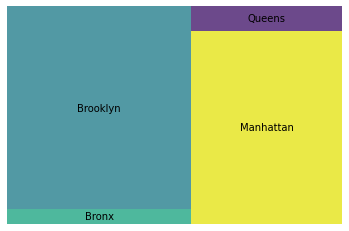

In [571]:
squarify.plot(sizes=count_bnb_plt['id'], label=count_bnb_plt['neighbourhood_group'], alpha=.8 )
plt.axis('off')
plt.show() 

In [573]:
with PdfPages(r'airbnbofficesburo.pdf') as export_pdf:      
    squarify.plot(sizes=count_bnb_plt['id'], label=count_bnb_plt['neighbourhood_group'], alpha=.8 )
    plt.axis('off')
    #plt.figure(figsize=((10,8)))

    export_pdf.savefig()
    plt.close()

In [241]:
print("Brooklyn: ",41/len(bnb_offices.index)*100)

Brooklyn:  51.24999999999999


In [242]:
print("Manhattan: ",32/len(bnb_offices.index)*100)

Manhattan:  40.0


# Competitors: existing co-working listings in NYC

In [38]:
js = open("./data/newyorker.js", "r")

In [39]:
nyorker = js.read()

In [40]:
# for regex search
import re

#nyorker

In [73]:
names = re.findall('(?<="name":).+?(?=,)', nyorker) 
lat = re.findall('(?<="lat":).+?(?=,)', nyorker) 
lng = re.findall('(?<="lng":).+?(?=,)', nyorker) 
address = re.findall('(?<="address":).+?(?=\\n)', nyorker) 
link = re.findall('(?<="url":).+?(?=\\n)', nyorker) 

In [83]:
cowrk = [names, address, lat, lng , link]

In [84]:
cowrk = pd.DataFrame(cowrk).T

In [85]:
cowrk.columns = ['Name', 'Address', 'Lat', 'Lng', 'Website']

In [87]:
cowrk.head()

,Name,Address,Lat,Lng,Website
0,"""The Artist Co-op""","""500 W 52nd St, Ste 3W, New York, NY 10019"",",40.766025,-73.991310,"""http://www.theartistco-op.com"""
1,"""Based In""","""49 Elizabeth St, New York, NY 10013"",",40.717240,-73.996948,"""https://basedin.com"""
2,"""Bat Haus""","""279 Starr St, Brooklyn, NY 11237"",",40.7068363,-73.92173629999999,"""http://www.bathaus.com"""
3,"""Hunters Point Studios""","""5102 21st St, Long Island City, NY, 11101"",",40.740818,-73.950202,"""https://www.hunterspointstudios.com/en"""
4,"""Kin""","""442 Broadway, 2nd Fl, New York, NY 10013"",",40.720215,-74.000874,"""https://kinspaces.com"""


In [88]:
cowrk.describe()

,Name,Address,Lat,Lng,Website
count,254,254,254,254,254
unique,246,248,249,248,241
top,"""Work Heights""","""85 Broad St, New York, NY 10004"",",40.732761,-73.992575,"""https://workbetter.us"""
freq,3,2,3,4,5


In [89]:
cowrk

,Name,Address,Lat,Lng,Website
0,"""The Artist Co-op""","""500 W 52nd St, Ste 3W, New York, NY 10019"",",40.766025,-73.991310,"""http://www.theartistco-op.com"""
1,"""Based In""","""49 Elizabeth St, New York, NY 10013"",",40.717240,-73.996948,"""https://basedin.com"""
2,"""Bat Haus""","""279 Starr St, Brooklyn, NY 11237"",",40.7068363,-73.92173629999999,"""http://www.bathaus.com"""
3,"""Hunters Point Studios""","""5102 21st St, Long Island City, NY, 11101"",",40.740818,-73.950202,"""https://www.hunterspointstudios.com/en"""
4,"""Kin""","""442 Broadway, 2nd Fl, New York, NY 10013"",",40.720215,-74.000874,"""https://kinspaces.com"""
...,...,...,...,...,...
249,"""KettleSpace at Blue Ribbon""","""280 5th Ave, Brooklyn, NY 11215"",",40.674299,-73.982441,"""https://www.kettlespace.com/locations/blue-ri..."
250,"""KettleSpace at The Wilson""","""132 W 27th St, New York, NY 10001"",",40.745974,-73.992709,"""https://www.kettlespace.com/locations/the-wil..."
251,"""KettleSpace at Aldea""","""31 W 17th St, New York, NY 10011"",",40.738762,-73.993791,"""https://www.kettlespace.com/locations/aldea"""
252,"""KettleSpace at Crave Fishbar""","""428 Amsterdam Ave, New York, NY 10024"",",40.784302,-73.977812,"""https://www.kettlespace.com/locations/crave-f..."


In [132]:
websites_http = [re.findall('(?<=http).+?(?=\.)', i) for i in link]
websites_www = [re.findall('(?<=www\.).+?(?=\.)', i) for i in link] 

In [184]:
websites = []
for i, x in enumerate(websites_www):
    if x:
        websites.append(x)
    else:
        websites.append(websites_http[i])

In [212]:
web_df

0           [theartistco-op]
1              [s://basedin]
2                  [bathaus]
3      [hunterspointstudios]
4            [s://kinspaces]
               ...          
249            [kettlespace]
250            [kettlespace]
251            [kettlespace]
252            [kettlespace]
253            [kettlespace]
Length: 254, dtype: object

In [185]:
# turn the list into a pandas Series
web_df = pd.Series(websites)

In [186]:
# count frequancy of each chain meaning the number of sites the have in the city
cnt_locations = web_df.value_counts().to_frame()
cnt_locations.reset_index(level=0, inplace=True)
cnt_locations = cnt_locations.rename(columns = {'index':'Network',0:'nb Locations'})
cnt_locations = cnt_locations.set_index('Network')

In [416]:
cnt_locations

,nb Locations
Network,
[voyagerhq],1
[roughdraft-nyc],1
[ledianspace],1
[://cubico],1
[launchpads],1
...,...
[s://workbetter],5
[s://theyard],8
[kettlespace],10


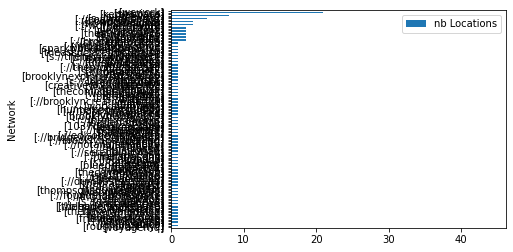

In [195]:
# Let's [put th largest number on top]
cnt_locations = cnt_locations.iloc[::-1]

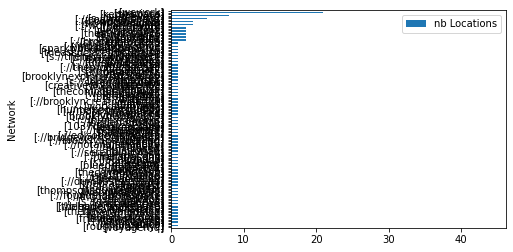

In [210]:
cnt_locations.plot.barh()
#cnt_locations.plot.bar
plt.draw()
plt.savefig("locations.pdf", transparent=True)

Companies with more than 1 location

In [216]:
cnt_locations[cnt_locations['nb Locations'] > 1].size

21

sum of locations

In [219]:
cnt_locations.sum()

nb Locations    254
dtype: int64

# Let's compare the co-working spaces with the location of airbnb listings

In [228]:
address = cowrk['Address'] 

let's extract the postal code to match with the neighbourhood

In [236]:
postal_code = [re.findall('[0-9]*..$', i) for i in address]

In [241]:
postal_code = [char.replace('\",', "") for string in postal_code for char in string]

In [380]:
#postal_code

Scrape a webpage containing details on which the neighbourhood a postal code implies and create a dictionary. 

In [322]:
import requests 

In [351]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup

In [324]:
import urllib.request

In [325]:
url = 'https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm'

In [327]:
# open a connection to a URL using urllib
webUrl  = urllib.request.urlopen(url)

#get the result code and print it
print ("result code: " + str(webUrl.getcode()))

# read the data from the URL and print it
data = webUrl.read()

result code: 200


In [328]:
postal_neigh = pd.read_html(data)

In [335]:
postal_neigh = postal_neigh[0]

In [336]:
post_neigh_df = pd.DataFrame(postal_neigh)

In [337]:
post_neigh_df

,Borough,Neighborhood,ZIP Codes
0,Bronx,Central Bronx,"10453, 10457, 10460"
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468"
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456"
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Bronx,Kingsbridge and Riverdale,"10463, 10471"
5,Bronx,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Bronx,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
7,Brooklyn,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
8,Brooklyn,Southwest Brooklyn,"11209, 11214, 11228"
9,Brooklyn,Borough Park,"11204, 11218, 11219, 11230"


In [411]:
Neighborhoods = []
Borough = []
for i, x in enumerate(postal_code):
    Neighborhoods.append(post_neigh_df.loc[post_neigh_df['ZIP Codes'].str.contains(x)]['Neighborhood'])
    Borough.append(post_neigh_df.loc[post_neigh_df['ZIP Codes'].str.contains(x)]['Borough'])

now let's see which Neighborhoods and Borough are the most popular for Co-Working

In [418]:
cowrk

,Name,Address,Lat,Lng,Website,Neighborhoods,Borough
0,"""The Artist Co-op""","""500 W 52nd St, Ste 3W, New York, NY 10019"",",40.766025,-73.991310,"""http://www.theartistco-op.com""","19 Chelsea and Clinton Name: Neighborhood, ...","19 Manhattan Name: Borough, dtype: object"
1,"""Based In""","""49 Elizabeth St, New York, NY 10013"",",40.717240,-73.996948,"""https://basedin.com""",22 Greenwich Village and Soho Name: Neighbo...,"22 Manhattan Name: Borough, dtype: object"
2,"""Bat Haus""","""279 Starr St, Brooklyn, NY 11237"",",40.7068363,-73.92173629999999,"""http://www.bathaus.com""",17 Bushwick and Williamsburg Name: Neighbor...,"17 Brooklyn Name: Borough, dtype: object"
3,"""Hunters Point Studios""","""5102 21st St, Long Island City, NY, 11101"",",40.740818,-73.950202,"""https://www.hunterspointstudios.com/en""","32 Northwest Queens Name: Neighborhood, dty...","32 Queens Name: Borough, dtype: object"
4,"""Kin""","""442 Broadway, 2nd Fl, New York, NY 10013"",",40.720215,-74.000874,"""https://kinspaces.com""",22 Greenwich Village and Soho Name: Neighbo...,"22 Manhattan Name: Borough, dtype: object"
...,...,...,...,...,...,...,...
249,"""KettleSpace at Blue Ribbon""","""280 5th Ave, Brooklyn, NY 11215"",",40.674299,-73.982441,"""https://www.kettlespace.com/locations/blue-ri...","12 Northwest Brooklyn Name: Neighborhood, d...","12 Brooklyn Name: Borough, dtype: object"
250,"""KettleSpace at The Wilson""","""132 W 27th St, New York, NY 10001"",",40.745974,-73.992709,"""https://www.kettlespace.com/locations/the-wil...","19 Chelsea and Clinton Name: Neighborhood, ...","19 Manhattan Name: Borough, dtype: object"
251,"""KettleSpace at Aldea""","""31 W 17th St, New York, NY 10011"",",40.738762,-73.993791,"""https://www.kettlespace.com/locations/aldea""","19 Chelsea and Clinton Name: Neighborhood, ...","19 Manhattan Name: Borough, dtype: object"
252,"""KettleSpace at Crave Fishbar""","""428 Amsterdam Ave, New York, NY 10024"",",40.784302,-73.977812,"""https://www.kettlespace.com/locations/crave-f...","26 Upper West Side Name: Neighborhood, dtyp...","26 Manhattan Name: Borough, dtype: object"


In [463]:
# turn to a data frame
Neighborhoods_df = pd.DataFrame(Neighborhoods)
# fill missing values with empty string ("")
Neighborhoods_df = Neighborhoods_df.fillna("")

In [481]:
Borough_df = pd.DataFrame(Borough)
Borough_df = Borough_df.fillna("")

In [480]:
cowrk['Neighborhoods'] = Neighborhoods
cowrk['Borough'] = Borough

In [464]:
Neighborhoods_df = Neighborhoods_df.iloc[:,: ].apply(lambda x: ''.join(x), axis=1)

Neighborhood           Chelsea and Clinton
Neighborhood    Greenwich Village and Soho
Neighborhood     Bushwick and Williamsburg
Neighborhood              Northwest Queens
Neighborhood    Greenwich Village and Soho
                           ...            
Neighborhood            Northwest Brooklyn
Neighborhood           Chelsea and Clinton
Neighborhood           Chelsea and Clinton
Neighborhood               Upper West Side
Neighborhood               Upper East Side
Length: 254, dtype: object

In [482]:
Borough_df = Borough_df.iloc[:,: ].apply(lambda x: ''.join(x), axis=1)

In [472]:
freq_neigh = Neighborhoods_df.groupby(['Neighborhood']).count()

In [487]:
freq_boro = Borough_df.groupby(['Borough']).count()

## The most populer neighbourhoods are:

In [478]:
freq_neigh.sort_values(ascending=False)

Neighborhood
Chelsea and Clinton                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    47
Greenwich Village and Soho                                                                                                                                                                                                                                                       

## The most populer Boroughs are:
Manhattan (3x) and Brooklyn (x)

In [491]:
freq_boro = freq_boro.sort_values(ascending=False)

In [505]:
freq_boro_df = pd.DataFrame(freq_boro)

In [506]:
freq_boro_df.reset_index(level=0, inplace=True)

In [516]:
freq_boro_df = freq_boro_df.rename(columns = {0:'Count'})
freq_boro_df

,Borough,Count
0,Manhattan,155
1,Brooklyn,55
2,,18
3,BronxBronxBronxBronxBronxBronxBronxBrooklynBro...,12
4,Queens,9
5,Staten Island,3
6,Bronx,2


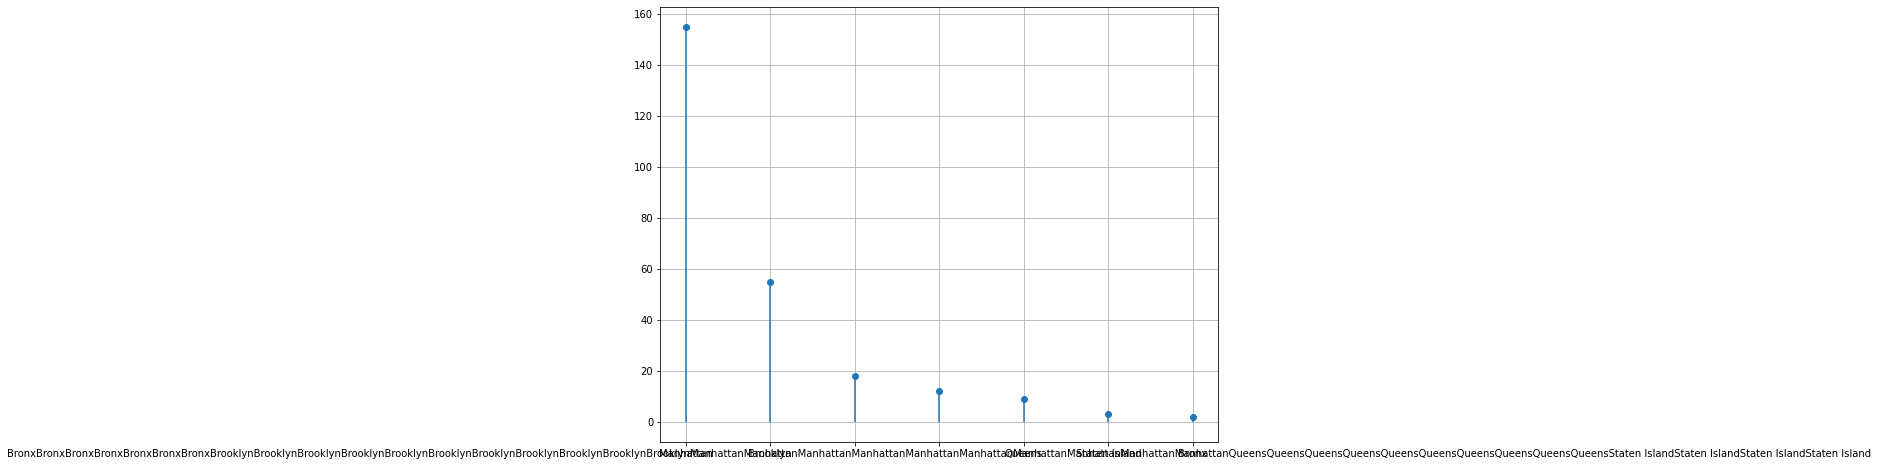

In [534]:
x = freq_boro_df.Borough
y = freq_boro_df.Count

plt.figure(figsize=((10,8)))
plt.grid(True)

plt.stem(x, y, use_line_collection=True, basefmt=' ')
plt.show()
#plt.show()

In [535]:
plt.savefig("coworkingByBorough.pdf", transparent=True)

<Figure size 432x288 with 0 Axes>

In [538]:
with PdfPages(r'coworkingByBorough.pdf') as export_pdf:      
    x = freq_boro_df.Borough
    y = freq_boro_df.Count
    plt.figure(figsize=((10,8)))
    plt.grid(True)

    plt.stem(x, y, use_line_collection=True)

    export_pdf.savefig()
    plt.close()

# Airbnb growth rate

In [603]:
# Source > https://craft.co/airbnb/revenue
years = [2010, 2012,2013,2014,2015,2016,2017,2018]
revenue = [8.4, 52.8, 250, 423, 900, 1500, 2600, 3600]
#growth = [740.00, 528.57, 69.20, 112.77, 66.67, 73.33, 38.46]
annual_revenue = {'Years': years,'Revenue': revenue}
#annual_revenue = {'Years': years,'Revenue': revenue,'Growth': growth}

annual_revenue

{'Years': [2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
 'Revenue': [8.4, 52.8, 250, 423, 900, 1500, 2600, 3600]}

In [604]:
annual_revenue_df = pd.DataFrame(annual_revenue)

In [605]:
annual_revenue_df

,Years,Revenue
0,2010,8.4
1,2012,52.8
2,2013,250.0
3,2014,423.0
4,2015,900.0
5,2016,1500.0
6,2017,2600.0
7,2018,3600.0


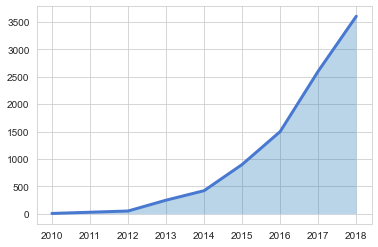

In [607]:
sns.set_style("whitegrid")
 
# Color palette
blue, = sns.color_palette("muted", 1)
 
# Create data
x = years
y = revenue
 
# Make the plot
fig, ax = plt.subplots()
ax.plot(x, y, color=blue, lw=3)
ax.fill_between(x, 0, y, alpha=.3)
#ax.set(xlim=(0, len(x) - 1), ylim=(0, None), xticks=x)

In [608]:
with PdfPages(r'growthrate.pdf') as export_pdf:      
    sns.set_style("whitegrid")
 
    # Color palette
    blue, = sns.color_palette("muted", 1)
 
    # Create data
    x = years
    y = revenue
 
    # Make the plot
    fig, ax = plt.subplots()
    ax.plot(x, y, color=blue, lw=3)
    ax.fill_between(x, 0, y, alpha=.3)
    #ax.set(xlim=(0, len(x) - 1), ylim=(0, None), xticks=x)

    export_pdf.savefig()
    plt.close()